In [3]:
import matplotlib.pyplot as plt
import numpy as np
import constant

FileNotFoundError: ./data/time/cad113/times_5qubit_2layer_g2gn.txt not found.

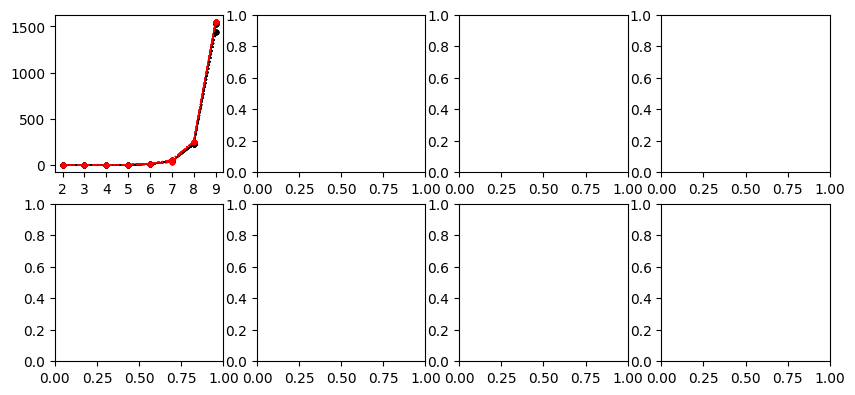

In [10]:
power_cad113 = np.transpose(np.array([
    [28.5, 28.7, 92.0, 27.6, 27.8],
    [29.7, 30.0, 55.9, 29.1, 29.1],
    [29.1, 30.0, 36.0, 29.7, 28.6],
    [28.9, 29.1, 33.0, 29.1, 29.2],
    [29.5, 29.0, 32.4, 29.0, 29.4],
    [29.0, 29.3, 29.3, 29.7, 29.0],
    [30.0, 30.0, 31.0, 29.5, 29.5],
    [30.0, 29.9, 30.0, 30.1, 29.9]
]))

power_wonder40 = np.transpose(np.array([
    [39.5, 38.5, 109.0, 39.0, 39.0],
    [41.0, 39.0, 102.0, 39.0, 39.0],
    [41.0, 39.0, 60.0, 39.0, 39.1],
    [38.8, 39.0, 55.5, 39.0, 39.0],
    [40.0, 39.0, 49.0, 38.8, 39.5],
    [40.0, 40.0, 40.0, 39.0, 39.0],
    [50.0, 50.0, 50.0, 50.0, 50.0],
    [70.0, 70.0, 70.0, 70.0, 70.0]
]))


layers = list(range(1, 10))
qubits = list(range(2, 10))

# times_cad113_vs_layers = np.loadtxt(f"./data/time/cad113/times_2qubit_{num_layer}layer_g2gn.txt")
# times_cad113_vs_qubits = np.loadtxt(f"./data/time/cad113/times_{num_qubits}qubit_1layer_g2gn.txt")
# times_wonder40_vs_layers = np.loadtxt(f"./data/time/wonder40/times_2qubit_{num_layer}layer_g2gn.txt")
# times_wonder40_vs_qubits = np.loadtxt(f"./data/time/wonder40/times_{num_qubits}qubit_1layer_g2gn.txt")

# num_qubits_edpss = [num_qubits_cad113 ** 2 * power_cad113, num_qubits_wonder40 ** 2 * power_wonder40]
fig, axs = plt.subplots(2, 4, figsize=(10, 4.5))

for i, computer in enumerate(['cad113', 'wonder40']):
    # ---- qubits ----
    timess = []
    for j, num_qubits in enumerate(qubits):
        times = np.loadtxt(f"./data/time/{computer}/times_{num_qubits}qubit_1layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_qubits in enumerate(qubits):
        for k, optimizer in enumerate(constant.optimizers_name):     
            
            axs[0, i*2].plot(qubits, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[0, i*2].set_xticks(qubits)
            axs[0, i*2].set_xticklabels(qubits)
    # ---- layers ----
    timess = []
    for j, num_layers in enumerate(layers):
        times = np.loadtxt(f"./data/time/{computer}/times_5qubit_{num_layers}layer_g2gn.txt")
        timess.append(times)
    timess = np.transpose(timess)
    for j, num_layers in enumerate(layers):
        for k, optimizer in enumerate(constant.optimizers_name):     
            axs[0, i*2].plot(layers, timess[k], 
                             marker='o', markersize=3, linewidth=1, label=f'{optimizer}', 
                             linestyle=constant.line_styles[k], 
                             color=constant.colors[k])
            axs[0, i*2].set_xticks(qubits)
            axs[0, i*2].set_xticklabels(qubits)
            
        # if i == 1:
        #     axs[0, i*2].set_yticklabels([])
        # if i == 0:
        #     axs[0, i*2].set_ylabel('Time (s)')
        # axs[0, i].set_yticks([0, 0.4, 0.8, 1.2])
        # axs[0, i].set_xlabel('# layers $(n=2)$')
    # for j, num_layers in enumerate(range(1, 10)):
    #     for k, optimizer in enumerate(constant.optimizers_name): 
    #         times = np.loadtxt(f"./data/time/{computer}/times_2qubit_{num_layers}layer_g2gn.txt")
    #         print(times)
    #         axs[0, i*2].plot(qubits, times[k], marker='o', markersize=3, linewidth=1, 
    #                         label=f'{num_layers} layers', 
    #                         linestyle=constant.line_styles[j], 
    #                         color=constant.colors[j])
    #         axs[0, i*2].set_xticks(qubits)
        # if i == 1:
        #     axs[0, i*2].set_yticklabels([])
        # if i == 0:
        #     axs[0, i*2].set_ylabel(r'Time ($\times 10^3$ s)')
        # axs[0, i*2].set_yticks([0, 1000, 2000])
        # axs[0, i*2].set_yticklabels([0, 1, 2])
        # axs[0, i*2].set_xticklabels([])
        # if i == 1:
        #     axs[1, i].set_yticklabels([])
        # # axs[1, i].set_yscale('log')
        # axs[1, i].set_ylim([-100, 2000])
        # axs[1, i].set_xlabel(r'# qubits $(L=1)$')
plt.tight_layout()
plt.savefig('./data/images/times.svg', bbox_inches='tight')

[[  7  32  81]
 [160 275 432]]
